<h1> Analisís del dataset Home Credit Default Risk </h1>

<h2> Contenido </h2>
<div>
<p1> A continuación se presenta un breve análisis del set dataset Home Credit Default Risk  que hace parte del reto  homonimo. Para este proceso se afrontan los siguientes aspectos</p1>
<ul>
  <li>Lectura y limpieza de datos </li>
  <li>Analisís de datos mediante visualización</li>
  <li>Selección de caracteristicas </li>
  <li>Creación de modelos predicitivos </li>
  <li>Validación </li>
    
</ul>
</div>

In [1]:
# Importando librerias
# -*- coding: utf-8 -*-
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

<h2> 1. Lectura y limpieza de datos</h2>
<p>  se carga  el set principal application_train.csv  y application_test.csv. para la realización de este ejercicio se omite el uso de la información adicional provista en el reto a modo de acotar la amplitud del análisis.
</p>

In [2]:
# se carga la descripción de las columnas del set y el set principal application_train.csv

data_description=pd.read_csv("all/HomeCredit_columns_description.csv")
df_app=pd.read_csv("all/application_train.csv")
application_descrp=data_description[data_description['Table'] == 'application_{train|test}.csv']
application_descrp[['Row','Description']]

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


In [3]:
df_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_app.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<p> Se  despliega el porcentaje de datos nulos para cada una de las variables y se organizan de mayor a menor. Se  puede observar que en gran cantidad de caracteristicas hay  ausencia de datos hasta del 70 por ciento. </p>

In [25]:

null_data_percent=df_app.isnull().sum().sort_values(ascending=False)*100/df_app.shape[0]
null_data_percent.head(60)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

<p> Debido a la sitiuación observada se decide realizar una selección de caracteristicas  buscando  las más representativas para el problema tal que, al realizar una limpieza de datos no se genere un impacto muy fuerte  en la catidad de muestras en caso de retirar las muestras nulas o un cambio en la distribución real de los datos si se aplicara correción mediante uso del promedio para valores continuos, o la moda para variables cualitativas para este proceso se plantearon 2 mecanismos:</p>
<ul> 
    <li>medir la correlación entre la variable objetivo y cada una de las caracteristicas</li>
    <li>  Análisis de varianza o ANOVA la cual  entrega los valores F y P donde la Puntuación de la prueba F         supone que los promedios de todos los grupos son los mismos, calcula la cantidad que los promedios reales se           desvían de la suposición, y la informa como la puntuación de la prueba F. Un puntaje más grande significa que       hay una diferencia mayor entre los promedios. mientras que el valor  P nos dice la importancia estadística de        nuestro valor de puntaje calculado.</li>
    

</ul>
<p>Primero hallamos la correlación y ordenamos los valores de mayor a menor, donde los valores mas cercanos a -1 y 1 tendran mas correlación con la variable objetivo
<p/>

In [29]:

corr_target_data=df_app.corr()["TARGET"].sort_values(ascending=False)
corr_target_data.drop(["TARGET"],inplace=True)
print corr_target_data.shape

#df_app[df_app["TARGET"]==1]["ELEVATORS_MODE"].hist(alpha=0.3)
#df_app[df_app["TARGET"]==0]["ELEVATORS_MODE"].hist(alpha=0.3)
#plt.show()


(105,)


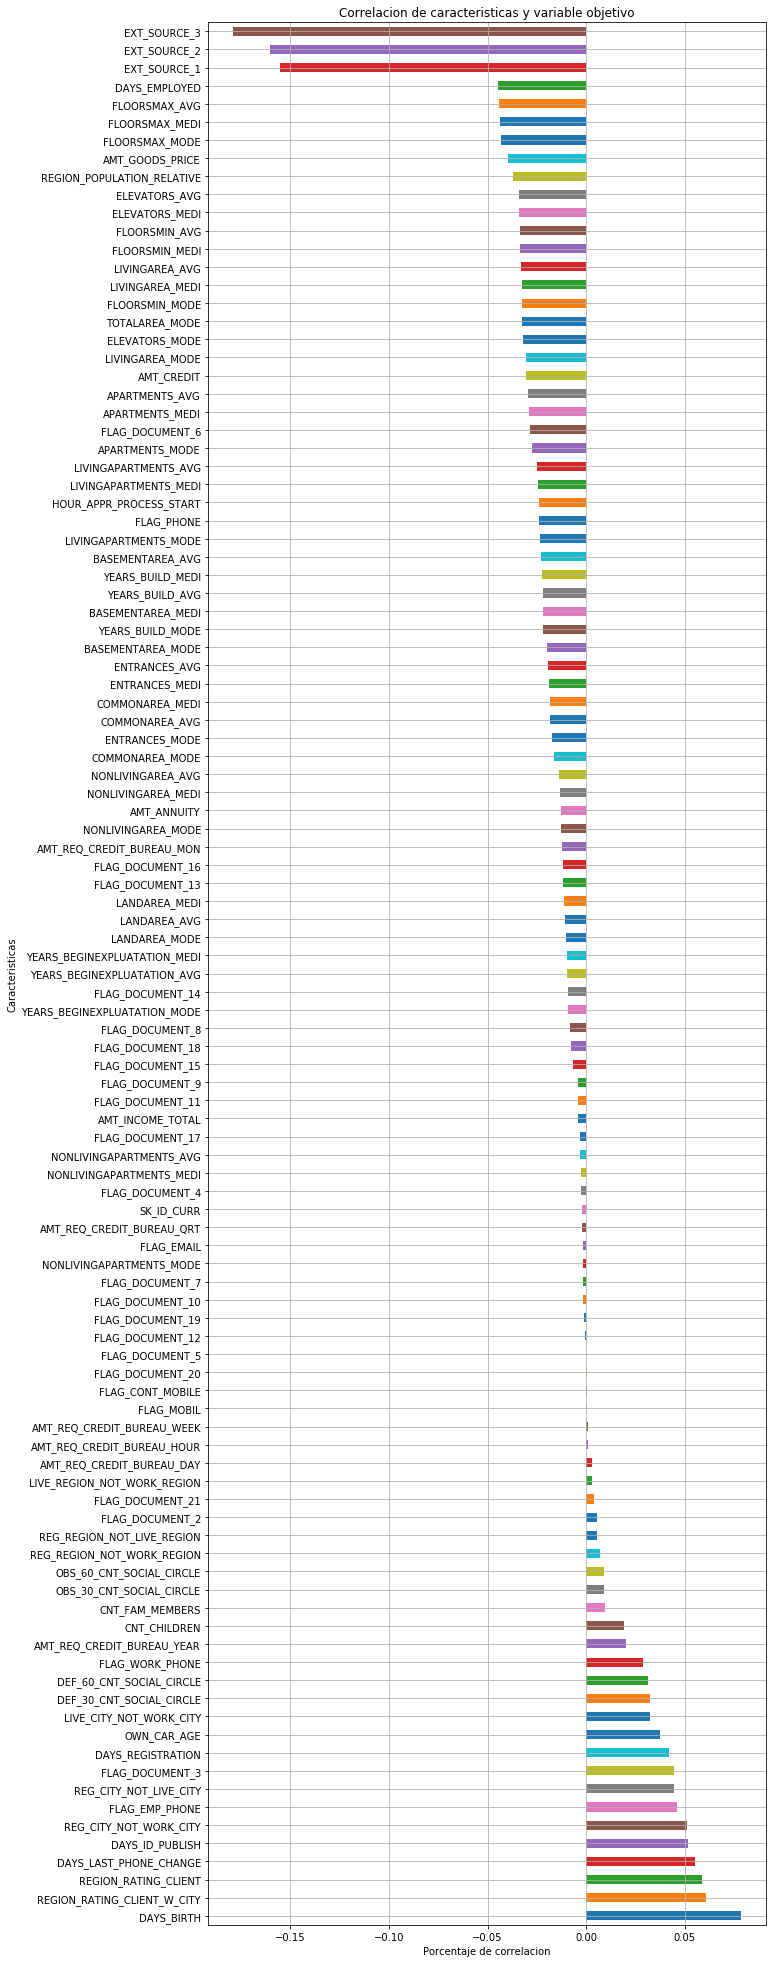

In [236]:
corr_target_data.plot(kind='barh',figsize=(10,35))
plt.title('Correlacion de caracteristicas y variable objetivo')
plt.xlabel('Porcentaje de correlacion')
plt.ylabel('Caracteristicas')
plt.grid()

<p> Se realiza el análsis de varianza y se grafican los valores F y P para cada una de las variables</p>

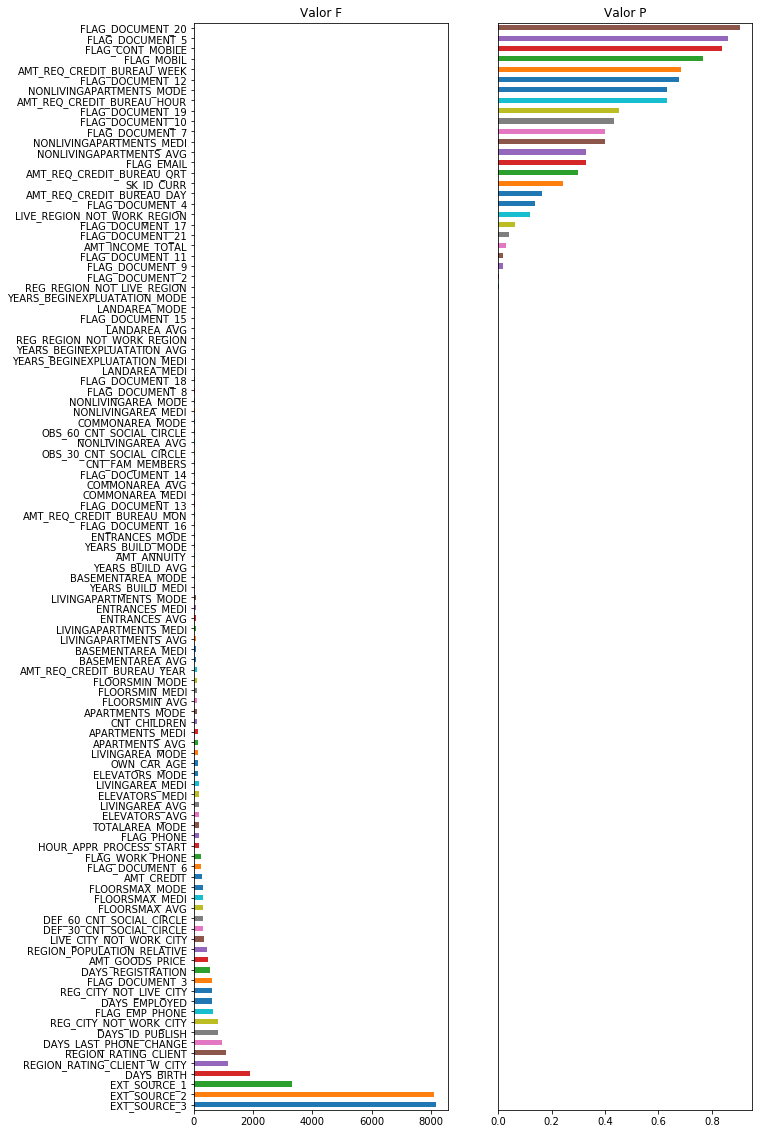

In [26]:
grouped_test = df_app.groupby(["TARGET"])
temp= {}
for key in df_app.columns:
    if key  != "TARGET": 
        if df_app[key].dtype=='float'or  df_app[key].dtype=='int'  :
        
            a_group = grouped_test.get_group(0)[key].dropna()
            b_group = grouped_test.get_group(1)[key].dropna()
        
            f_val, p_val = stats.f_oneway(a_group,b_group)
            temp[key] =[f_val,p_val]
features_score= pd.DataFrame(data=temp,index=["F-Value","P-Value"]).T
features_score.sort_values(by="F-Value",ascending=False,inplace=True)


plt.subplot(121),features_score["F-Value"].plot(kind='barh',figsize=(10,20)), plt.title('Valor F')
plt.subplot(122),features_score["P-Value"].plot(kind='barh',figsize=(10,20),yticks=[]),plt.title('Valor P')
plt.yticks([])
plt.show()
#    f_val, p_val = stats.f_oneway(grouped_test.get_group(0), grouped_test.get_group(1))


<p>  A partir del analisis anterior se puede afirmar que las variables de mayor relevancia para la predicción de la variable objetivo son EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH, DAYS_LAST_PHONE_CHANGE entre otras  las cuales obtuvieron los mayores valores de correlación y los mayores valores F y una buena confiabilidad estadistica a partir del valores P pequeños. a continuación se grafica  la distribución de algunas de las caracteristicas encontradas, donde se puede observar que a pesar de existir sobrelapamiento entre las clases a predecir se puede  observar diferencias en su distribución. Se espera que a partir de la acción  conjunta de  lasdiferentes caracteristicas  seleccionadas se logre una mayor separación de las clases </p>  

Text(0.5,1,u'DAYS_BIRTH')

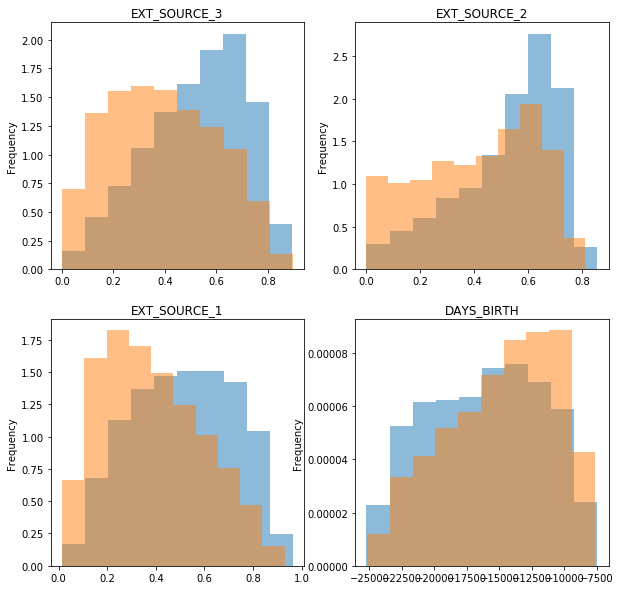

In [27]:
grouped_test = df_app.groupby(["TARGET"])
plt.subplot(221),
grouped_test.get_group(0)["EXT_SOURCE_3"].plot(kind='hist',alpha=0.5,density=True,figsize=(10,10))
grouped_test.get_group(1)["EXT_SOURCE_3"].plot(kind='hist',alpha=0.5,density=True,figsize=(10,10))
plt.title("EXT_SOURCE_3")

plt.subplot(222)
grouped_test.get_group(0)["EXT_SOURCE_2"].plot(kind='hist',alpha=0.5,density=True,figsize=(10,10))
grouped_test.get_group(1)["EXT_SOURCE_2"].plot(kind='hist',alpha=0.5,density=True,figsize=(10,10))
plt.title("EXT_SOURCE_2")

plt.subplot(223)

grouped_test.get_group(0)["EXT_SOURCE_1"].plot(kind='hist',alpha=0.5,density=True,figsize=(10,10))
grouped_test.get_group(1)["EXT_SOURCE_1"].plot(kind='hist',alpha=0.5,density=True,figsize=(10,10))
plt.title("EXT_SOURCE_1")

plt.subplot(224)
grouped_test.get_group(0)["DAYS_BIRTH"].plot(kind='hist',alpha=0.5,density=True,figsize=(10,10))
grouped_test.get_group(1)["DAYS_BIRTH"].plot(kind='hist',alpha=0.5,density=True,figsize=(10,10))
plt.title("DAYS_BIRTH")


<h2> Creación del modelo  y Validación</h2>
<p> para el siguiente procedimiento se plantea el escoger las mejores caracteristicas de ambos metodos de selección de caracteristicas y utilizarlas para la construcción de un clasificador. Se puede observar que al tomar un numero reducido  de caractersticas de cada metodo de seleccion y el compararlas se obtiene que son las mismas, lo que permite constatar el buen funcionamiento del procedimiento planteado </p>

In [30]:
num_features=6
print("Cantidad de caracteristicas de cada metodo:",num_features)
best_features_corr=corr_target_data.index[:num_features/2].tolist()+corr_target_data.index[-num_features/2:].tolist()
best_features_ANOVA=features_score.index[:num_features].tolist()
final_features= list(set(best_features_corr+best_features_ANOVA+["TARGET"]))
print("Cantidad de caracteristicas a usar al cotejar:",len(final_features))
print final_features
dataset= df_app[final_features]

# se normalizan los datos
dataset.dropna(inplace=True)
print dataset.shape
# se evalua la respuesta al eliminar los datos nulos o su remplazo por  el promedio de cada caracteristicas.
dataset.replace([np.inf, -np.inf], np.nan,inplace=True)
dataset.dropna(inplace=True)

#dataset.fillna(dataset.mean(), inplace=True)
Target= dataset["TARGET"]

dataset.drop(labels="TARGET",axis=1,inplace=True)

dataset_norm = (dataset - dataset.mean()) / (dataset.max())
print dataset_norm.shape
#dataset_norm.dropna(),Target.dropna()

#print dataset_norm.shape,Target.shape


('Cantidad de caracteristicas de cada metodo:', 6)
('Cantidad de caracteristicas a usar al cotejar:', 7)
['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'REGION_RATING_CLIENT', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'TARGET']
(109589, 7)


/home/ralvarez/Documentos/LPR/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/ralvarez/Documentos/LPR/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ralvarez/Documentos/LPR/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ralvarez/Documentos/L

(109589, 6)


<p> Para el proceso de clasificación se determinan dos maquinas de aprendizaje, la primer es una regresión logistica y la segunda es una maquina de vectores de soporte con kernel polinomial de grado preferiblemente impar en nuestro caso igual a 5.</p>


In [31]:
from sklearn import linear_model
from sklearn import svm
logreg = linear_model.LogisticRegression(C=1e5,class_weight={0: 1,1:5})
logreg.fit(dataset_norm,Target)
print logreg.score(dataset_norm,Target, sample_weight=None)
clf = svm.SVC(kernel='poly', degree=5, C=1,class_weight={0: 1,1:5})
clf.fit(dataset_norm,Target)
print clf.score(dataset_norm,Target, sample_weight=None)

0.8791667046875142
0.9270182226318335


<p> como rubrica preliminar de validación se selecciona una matriz de confusión que permite conocer la cantidad de falsos positivos  y verdaderos positivos para cada clase, ademas de las clases en conflicto en caso de una clasificación multiclase.</p>


In [ ]:
from sklearn.metrics import confusion_matrix

print "Log Regression: "
print confusion_matrix(Target, logreg.predict(dataset_norm))
print "SVM: "
print confusion_matrix(Target, clf.predict(dataset_norm))

 Log Regression: 
[[93853  7738]
 [ 5504  2494]]
SVM: 


<h2> Validación </h2><p> posterior a un ajuste preliminar de los parametros y caracteristicas  se plantea 
   medir el rendimiento del clasificador mediante una validación cruzada la cual permite conocer el  rendimiento del clasificador  de forma independiente al set de entrenamiento y validación que se utilice. para este proposito se divide el set de entrenamiento en  k folds o cojuntos de los cuales k -1 seran utilizados para entrenamiento y  el restante para validación, evaluando todos los casos posibles. posteriormente se realizara un promedio del rendimiento resultante para conocer una aproximación más objetiva del precisión real del clasificador entrenado. </p> 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, dataset_norm, Target, cv=5)
print("Rendimiento regresor logistico: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, dataset_norm, Target, cv=5)
print("Rendimiento SVM polinomial: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Rendimiento regresor logistico: 0.88 (+/- 0.00)
